In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Phase 1 – Data Understanding & Setup

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| Column          | Meaning                                                                    |
| --------------- | -------------------------------------------------------------------------- |
| **PassengerId** | A unique ID assigned to each passenger (just a serial number).             |
| **Survived**    | Target variable — `0` = did not survive, `1` = survived.                   |
| **Pclass**      | Passenger class: `1` = 1st (luxury), `2` = 2nd (mid), `3` = 3rd (economy). |
| **Name**        | Passenger’s full name.                                                     |
| **Sex**         | Gender (`male` / `female`).                                                |
| **Age**         | Age in years.                                                              |
| **SibSp**       | Number of siblings or spouses aboard with the passenger.                   |
| **Parch**       | Number of parents or children aboard with the passenger.                   |
| **Ticket**      | Ticket number.                                                             |
| **Fare**        | Ticket price.                                                              |
| **Cabin**       | Cabin number (if assigned).                                                |
| **Embarked**    | Port of embarkation: `C` = Cherbourg, `Q` = Queenstown, `S` = Southampton. |


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
# check for total missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Our goal is to predict Survived (0 or 1).

This means:
Output is categorical (two possible values: survived or not).
This is a binary classification problem.

### Phase 2 — Data Cleaning
todo:
- Decide what to do with missing Age, Cabin, Embarked values.
- Check for weird or inconsistent values.
- Prepare dataset for analysis.

**2.1 Handle Missing Values**

In [7]:
df['Age'].median()

28.0

In [8]:
df['Age'].fillna(df['Age'].median(), inplace = True)

C:\Users\saiha\AppData\Local\Temp\ipykernel_28080\3612560828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)


In [9]:
df.drop(columns=['Cabin'], inplace=True)  # more than half is missing in this column. drop it.

In [10]:
# Categorical variable with 3 possible values (C, Q, S). Fill with most common value (mode).

print(df['Embarked'].mode()[0])

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

S


C:\Users\saiha\AppData\Local\Temp\ipykernel_28080\2066622475.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


**2.2 Remove Irrelevant Columns**

In [11]:
df.drop(columns = ['PassengerId', 'Ticket'], inplace=True)

**2.3 Check if all missing values are handled**

In [12]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Phase 3 – EDA (Exploratory Data Analysis)

In [14]:
# dataset summary after cleaning

# shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# summary of numeric columns
print("\nNumeric Summary:")
print(df.describe())

# unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include=['object']).columns:
    if col == 'Name':
        continue
    print(f"{col}: {df[col].unique()}")


Rows: 891, Columns: 9

Numeric Summary:
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Unique Values in Categorical Columns:
Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q']


In [24]:
print(f"survived : {len(df[df["Survived"] == 1])}")
print(f"died : {len(df[df["Survived"] == 0])}")

survived : 342
died : 549


In [25]:
# survival rate
survival_rate = df['Survived'].mean() * 100
print(f'{survival_rate:.2f}')

38.38


**observe trends**

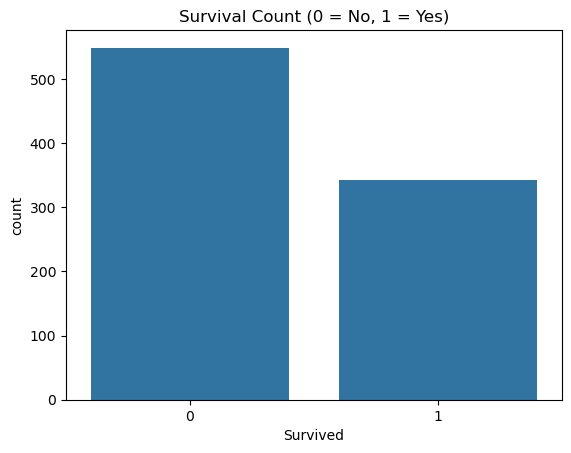

In [26]:
# 1. Survival Count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

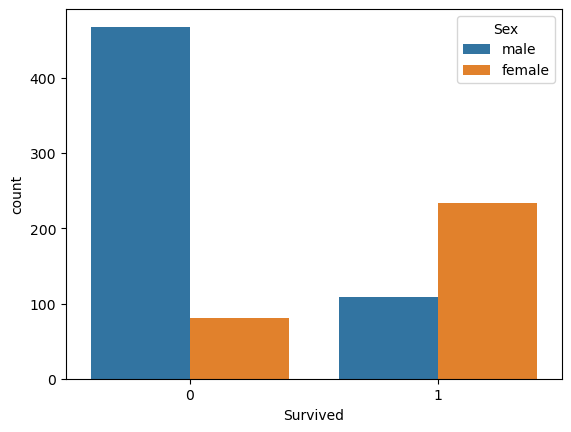

In [44]:
# 2. Survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title= 'Survival by Gender'
plt.show()

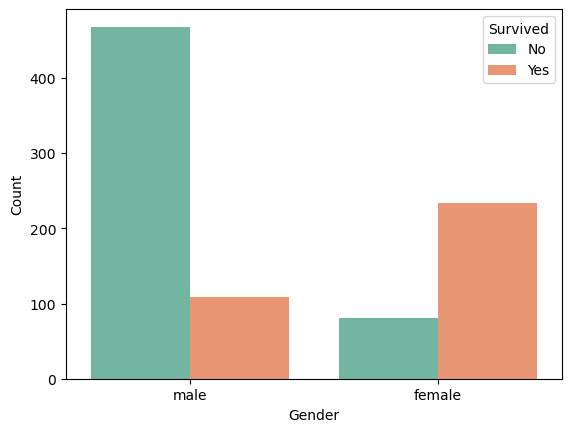

In [46]:
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title = 'Survival Count by Gender'
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

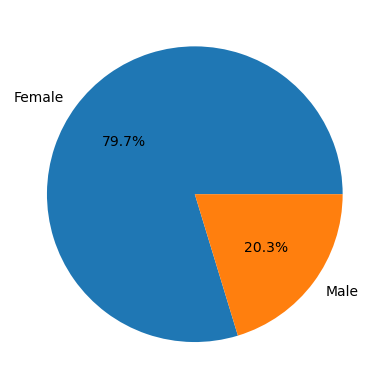

In [47]:
# survival by gender pie plot
survival_gender= (df.groupby("Sex")["Survived"].mean()*100)
plt.pie(survival_gender, labels=(['Female','Male']),autopct='%1.1f%%')
plt.title = "Survival rate based on gender"
plt.show()

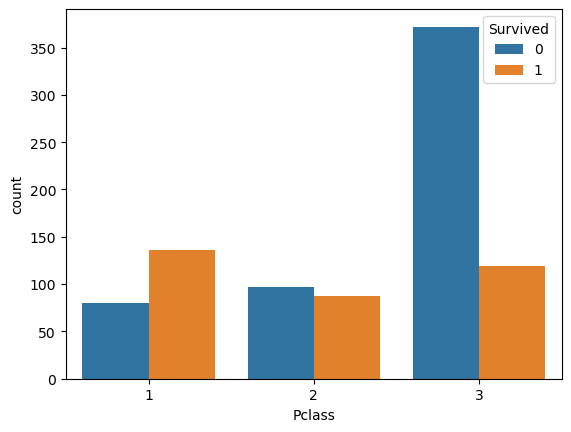

In [48]:
# 3. Survival by Passenger Class
# it was told that 1st class has the pass for life boats
sns.countplot(x='Pclass', hue='Survived', data = df)
plt.title=("Survival by Passenger Class")
plt.show()

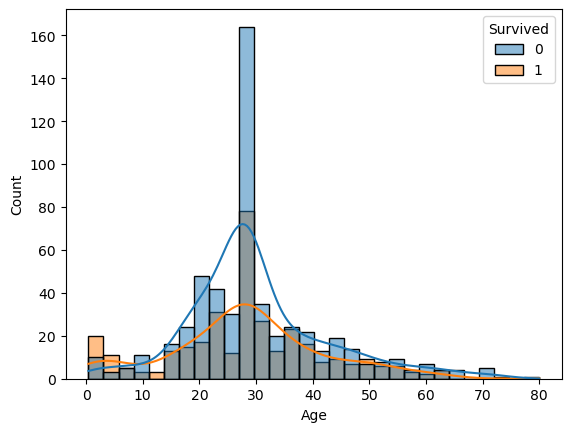

In [66]:
# 4. Age Distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived',bins=30, kde=True)
plt.title = 'Age Distribution by Survival'
plt.show()

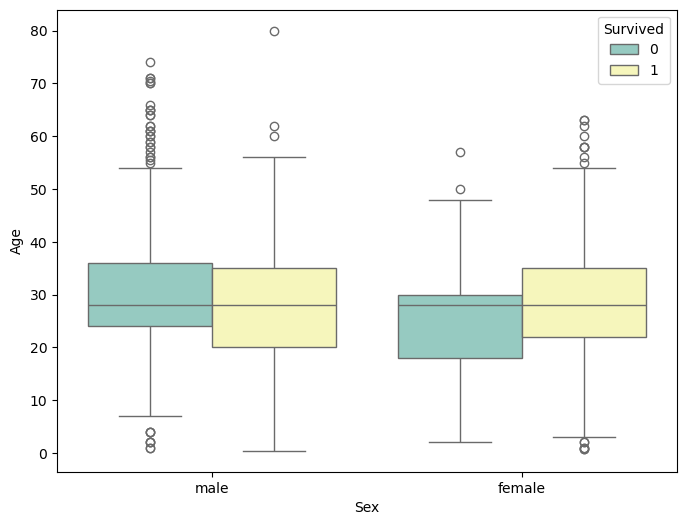

In [70]:
# 5. Age vs Survival vs Gender

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Sex', y='Age', hue='Survived', palette='Set3')
plt.title = 'Age vs Survival by Gender'
plt.show()

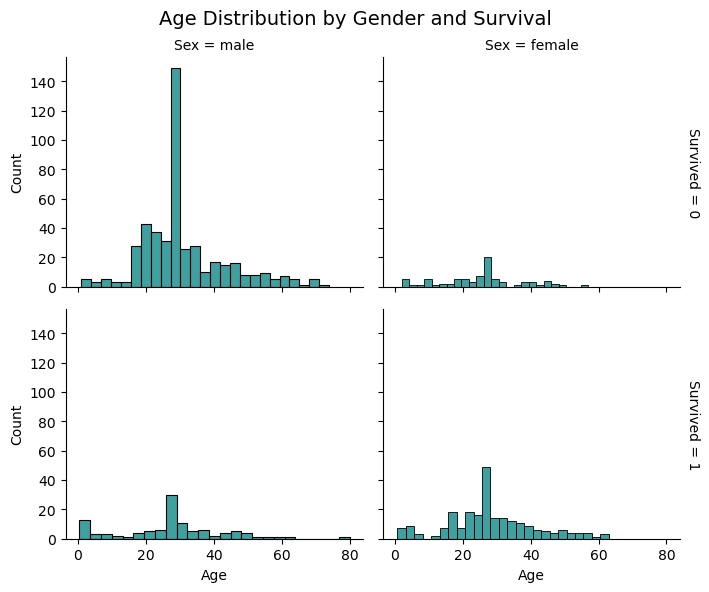

In [77]:
g = sns.FacetGrid(df, col='Sex', row='Survived', margin_titles=True, height=3, aspect=1.2)
g.map_dataframe(sns.histplot, x='Age', bins=25, color='teal')
g.set_axis_labels("Age", "Count")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Age Distribution by Gender and Survival', fontsize=14)
plt.show()

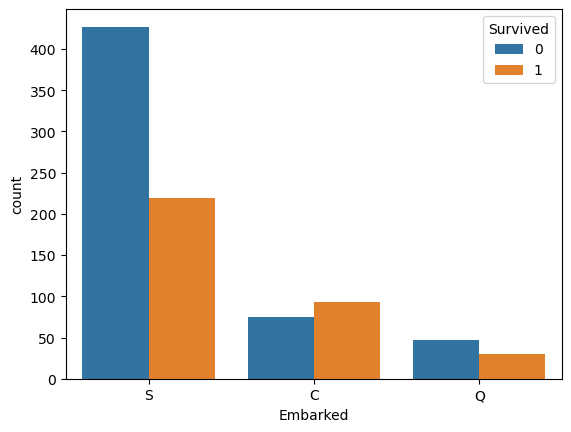

In [78]:
# 6. Survival by Port of Embarkation
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title = 'Survival by Embarked Port'
plt.show()

In [79]:
#average fare paid by different classes of passengers
print("Average fare paid by passengers from each class:")
print(df.groupby("Pclass")["Fare"].mean())

Average fare paid by passengers from each class:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


C:\Users\saiha\AppData\Local\Temp\ipykernel_28080\2298633058.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_age= df.groupby(["Sex", pd.cut(df.Age, [0, 18, 30, 50, 80])])["Survived"].mean()


Sex     Age     
female  (0, 18]     0.676471
        (18, 30]    0.727273
        (30, 50]    0.779070
        (50, 80]    0.941176
male    (0, 18]     0.338028
        (18, 30]    0.144737
        (30, 50]    0.225806
        (50, 80]    0.127660
Name: Survived, dtype: float64


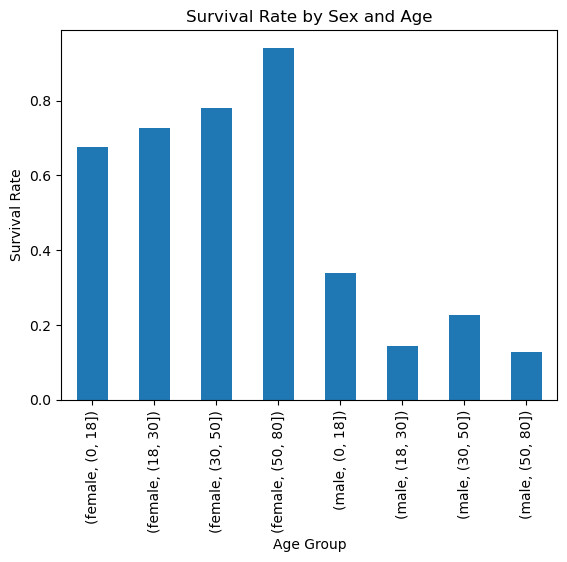

In [80]:
# What was the survival rate based on age and sex of the passenger?

survival_age= df.groupby(["Sex", pd.cut(df.Age, [0, 18, 30, 50, 80])])["Survived"].mean()
print(survival_age)
ax = survival_age.plot(kind="bar", stacked=True)
ax.set_title("Survival Rate by Sex and Age")
ax.set_xlabel("Age Group")
ax.set_ylabel("Survival Rate")
plt.show()

**Insights from Visuals**

- Gender: Women had much higher survival rates (because of "women and children first" policy).
- Class: 1st-class passengers had higher survival rates than 3rd-class.
- Age: Younger passengers (children) had slightly higher survival.
- Embarked: Passengers from Cherbourg had better odds.

### Phase 4 – Feature Engineering

Goal: Create new, more informative features from the existing data to help the model learn better.

*4.1 – Extract Passenger Title from Name*

*Titles like Mr, Mrs, Miss, Master often carry survival patterns. Passenger names contain titles like Mr, Mrs, Miss, Master which often correlate with survival (e.g., women & children had higher survival rates)*

In [101]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [102]:
title_mapping = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs",
    "Lady": "Rare", "Countess": "Rare", "Capt": "Rare",
    "Col": "Rare", "Don": "Rare", "Dr": "Rare", "Major": "Rare",
    "Rev": "Rare", "Sir": "Rare", "Jonkheer": "Rare", "Dona": "Rare"
}

df['Title'] = df['Title'].replace(title_mapping)
print(df['Title'].value_counts())

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


*4.2 - Family size*

*SibSp (siblings/spouses aboard) + Parch (parents/children aboard) tells us family connections. Bigger families may stick together → survival patterns.*

In [103]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [104]:
df['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

*4.3 – IsAlone*
<br/>
*People traveling alone had different survival odds compared to those with family*

In [105]:

df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

*4.4 age and fare binning - continuous values*
*Binning helps models capture non-linear relationships (like children having higher survival rates)*

In [106]:
# Age bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=False)

# Fare bins (quartiles)
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=False)

*4.5: Encode categorical features*
<br/>
*ML models need numerical input, so we convert categories like Sex, Embarked, and Title into numbers*

In [107]:
# Save a copy for visualization
df['Title_orig'] = df['Title']
df['Sex_orig'] = df['Sex']
df['Embarked_orig'] = df['Embarked']

In [108]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for col in ['Sex', 'Embarked', 'Title']:
    df[col] = label.fit_transform(df[col].astype(str))

**Phase 4.6 – Visualizing New Features**

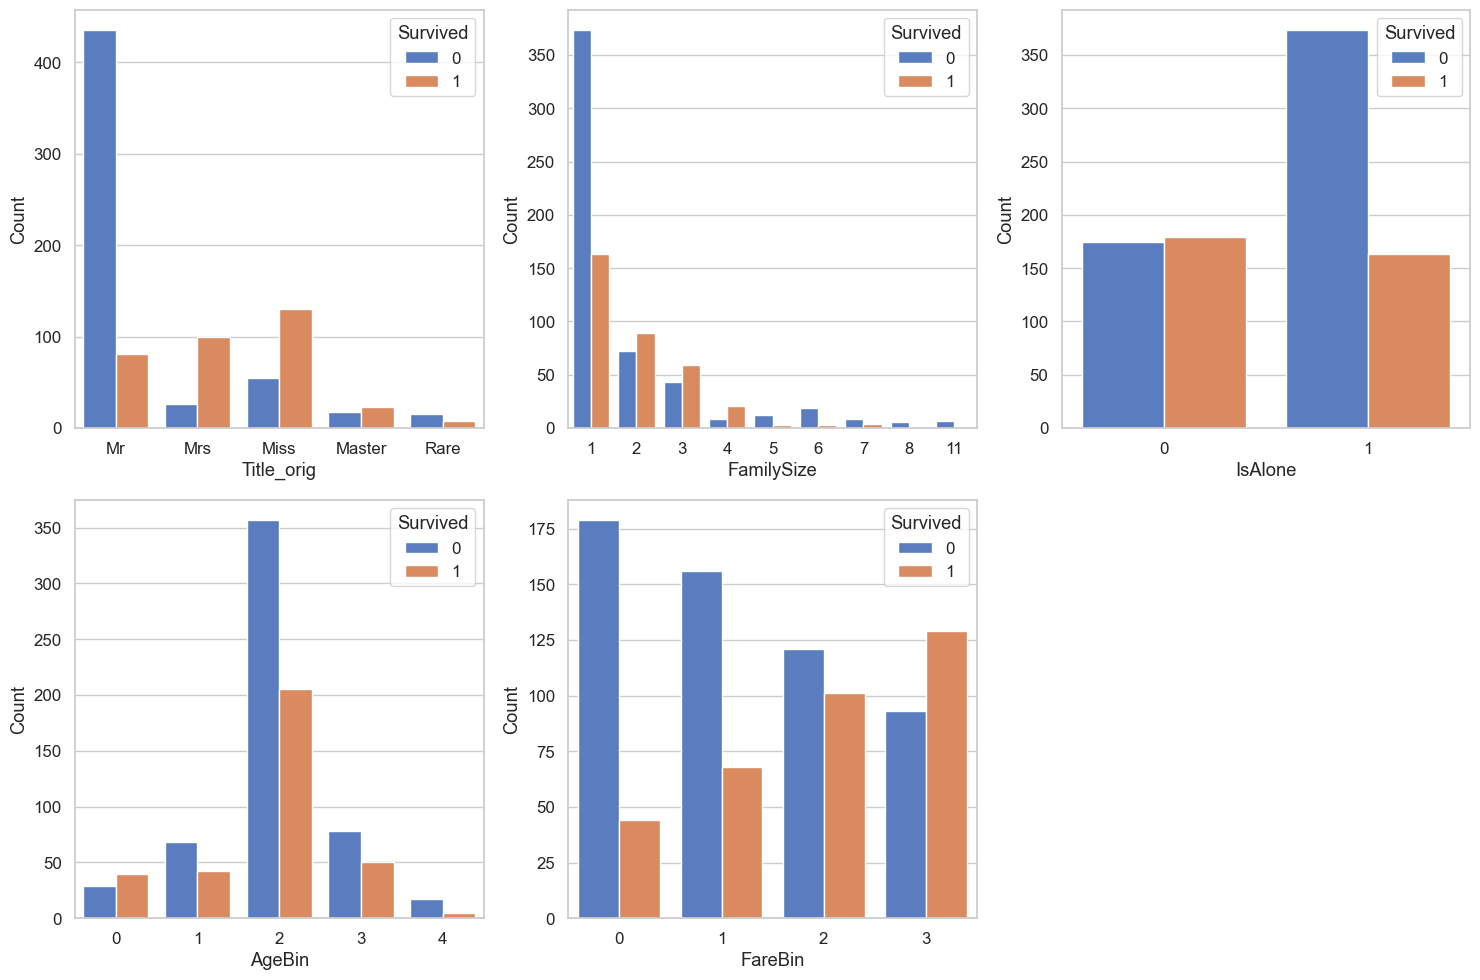

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a clean visual style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# new features but not for visuals because they are transformed into numeric codes for ml model
new_features = ['Title', 'FamilySize', 'IsAlone', 'AgeBin', 'FareBin'] 

# Visualize readable versions
features_to_plot = ['Title_orig', 'FamilySize', 'IsAlone', 'AgeBin', 'FareBin']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=feature, hue='Survived')
    plt.title = f"Survival Count by {feature}"
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [110]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,AgeBin,FareBin,Title_orig,Sex_orig,Embarked_orig
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,2,0,2,0,Mr,1,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,3,2,0,2,3,Mrs,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1,1,2,1,Miss,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,3,2,0,2,3,Mrs,0,2
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,2,1,1,2,1,Mr,1,2


#### Correlation Heatmap 
*Pearson correlation, which shows how strongly each numeric feature relates to survival (from -1 to +1).*

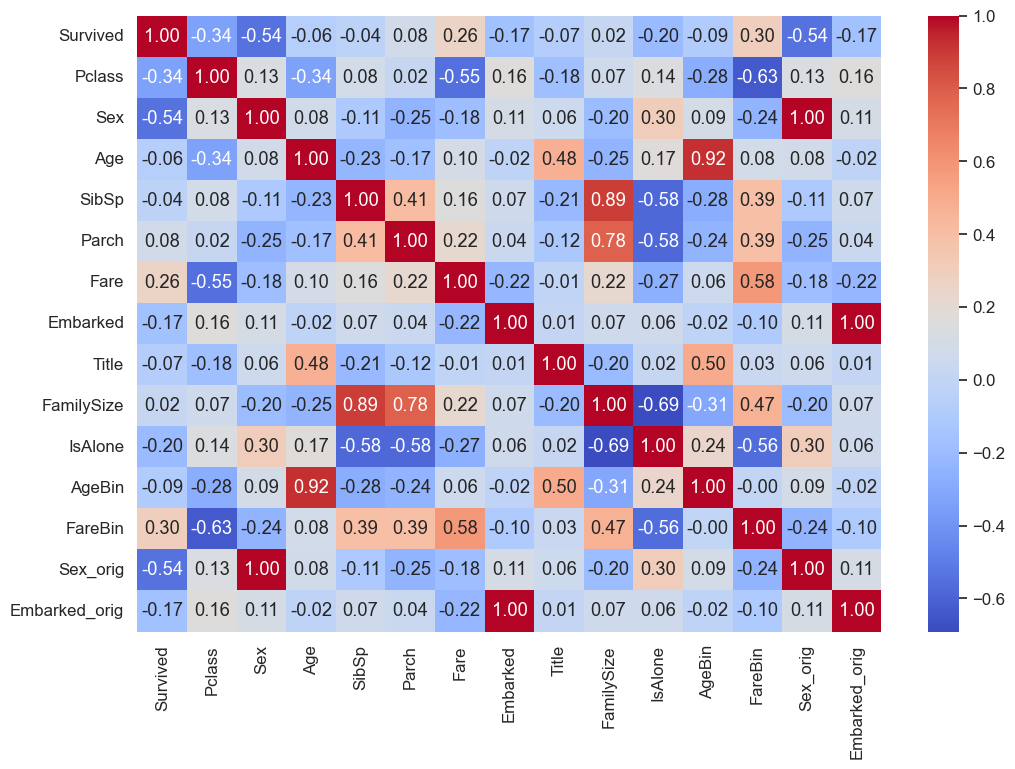


Top correlations with Survived:
 Survived         1.000000
FareBin          0.299357
Fare             0.257307
Parch            0.081629
FamilySize       0.016639
SibSp           -0.035322
Age             -0.064910
Title           -0.071174
AgeBin          -0.092670
Embarked_orig   -0.167675
Embarked        -0.167675
IsAlone         -0.203367
Pclass          -0.338481
Sex             -0.543351
Sex_orig        -0.543351
Name: Survived, dtype: float64


In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# selects only numeric columns for correlation
corr = df.corr(numeric_only=True)

# plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title="Correlation Heatmap of Features"
plt.show()

# sort and print top correlated features with 'Survived'
corr_target = corr['Survived'].sort_values(ascending=False)
print("\nTop correlations with Survived:\n", corr_target)

#### how to read the corr map :
<ul>
<li>Closer to +1: strong positive relation  - higher value - more survival. <li>Closer to -1: strong negative relation - higher value - less survival.<li>Around 0: weak or no relationship
</ul>

<pre>
Few insights :
FareBin (0.30) : Moderate positive, passengers who paid higher fares (upper quartiles) were more likely to survive.
IsAlone (-0.20): Moderate negative, being alone reduces chance of survival. Strong and meaningful.
Pclass (-0.33): Moderate negative, 3rd class = lower survival.
sex (-0.54): Strong negative, 1 = male, 0 = female => males had much lower survival rates.

Most important predictors (by magnitude):-

Sex → biggest factor (females survived more)
Pclass → 1st class passengers survived more
IsAlone → being alone reduces survival
Fare and FareBin → higher fares → better survival odds

understanding example:
A negative correlation with Survived means that as the feature value 'increases', survival tends to 'decrease' and vice versa.
So for Sex = -0.54, survival drops when the value of Sex increases.
corr(Sex, Survived) = -0.54
0 is female, 1 is male
when sex "increases" from 0 to 1, "survived" decreases
when sex "decreases" from 1 to 0, "survived" increases
</pre>

In [98]:
df.groupby('Sex_orig')['Survived'].mean()

Sex_orig
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [99]:
df.groupby('Sex')['Survived'].mean()

Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64

### Phase 5 – Modeling Overview

#### 5.1 Split into train/test sets.

In [116]:
from sklearn.model_selection import train_test_split

In [118]:
X = df.drop(columns=['Survived', 'Name','Sex_orig', 'Embarked_orig', 'Title_orig'])
y = df['Survived']

In [123]:
# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Training:", X_train.shape)
print("X Testing:", X_test.shape)

print("y Training:", y_train.shape)
print("y Testing:", y_test.shape)

X Training: (712, 12)
X Testing: (179, 12)
y Training: (712,)
y Testing: (179,)


#### 5.2 Train a Baseline Model (Logistic Regression)

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [126]:
# Train model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [127]:
# Predictions
y_pred = logreg.predict(X_test)

In [128]:
# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.8044692737430168

Confusion Matrix:
 [[91 14]
 [21 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



#### 5.3 – Feature Importance (Model Coefficients)

Understanding which features most influence survival according to Logistic Regression.

In [130]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

In [132]:
print("\nFeature Importance (Logistic Regression) \n")
display(importance)


Feature Importance (Logistic Regression) 



,Feature,Coefficient
11,FareBin,0.191053
2,Age,0.004677
5,Fare,0.001665
4,Parch,-0.025633
7,Title,-0.096724
6,Embarked,-0.193623
3,SibSp,-0.262780
8,FamilySize,-0.288060
10,AgeBin,-0.544260
9,IsAlone,-0.572474


#### 5.4 Train non linear model (Random Forest)

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [134]:
# train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [135]:
# Prediction
y_pred_rf = rf.predict(X_test)

In [136]:
# evaluate 
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8268156424581006

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



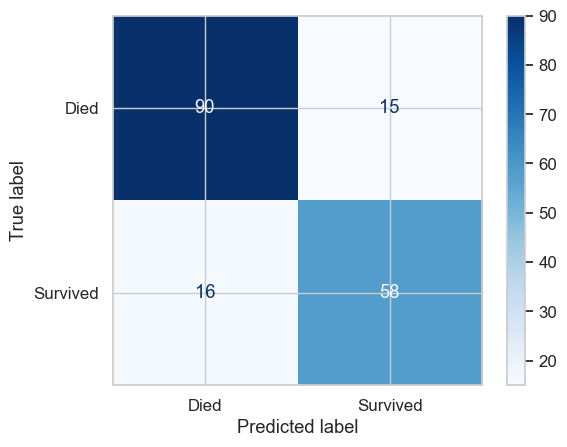

In [145]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Died', 'Survived'])
disp.plot(cmap='Blues')
plt.title = "Random Forest Confusion Matrix"
plt.show()

<pre>
TN (90): correctly predicted deaths
TP (58): correctly predicted survivors
FP (15): model said “survived” but they actually died
FN (16): model said “died” but they actually survived
</pre>


## Final Report Summary – Titanic Survival Prediction

### Objective
The goal of this project was to predict passenger survival on the Titanic using demographic and travel information from the dataset.  

---

###  Phase 1–4: Data Cleaning & Feature Engineering
- Missing values in **Age**, **Embarked**, and **Fare** were imputed.  
- Created new features:  
  - **Title** (from Name)  
  - **FamilySize = SibSp + Parch + 1**  
  - **IsAlone** (flag for traveling alone)  
  - **AgeBin** and **FareBin** (binned versions for better grouping)  
- Encoded categorical columns like **Sex**, **Embarked**, and **Title** numerically.

---

###  Phase 5–6: Modeling & Evaluation
Two supervised learning models were trained and tested:  

| Model | Accuracy | Comments |
|--------|-----------|-----------|
| Logistic Regression | **80%** | Strong linear baseline |
| Random Forest | **82–83%** | Best performance, captures non-linear relations |

**Classification Report (Random Forest):**
- Precision (Survived): **0.79**  
- Recall (Survived): **0.78**  
- F1-score (Survived): **0.79**

**Confusion Matrix Summary:**
- True Negatives: 90  
- True Positives: 58  
- False Positives: 15  
- False Negatives: 16  

---

### 🔍 Key Insights
- **Sex** has the strongest correlation (≈ –0.54) — **females survived more often**.  
- **Pclass** (≈ –0.33): passengers in **1st class** had higher survival chances.  
- **Fare and FareBin** (positive correlation): higher fares → higher survival.  
- **IsAlone** (≈ –0.20): traveling alone reduced survival probability.  

---

### Conclusion
The **Random Forest model** achieved the highest accuracy (**~83%**) and provided interpretable insights about social and economic factors affecting survival.  
The project demonstrates the full machine learning pipeline:
**data cleaning → feature engineering → modeling → evaluation → interpretation.**

Future improvements:
- Hyperparameter tuning for RF or XGBoost  
- Use ensemble stacking for better performance  
- Analyze partial dependence plots for deeper feature insights  